## Compare Peggy WxPAK (Coastal Enviornmental) to ENGR ATRH to Tflex system

February 2019

- two transmitters where used on the wxpak

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
## wxpak ingest
wxpakfile1='M2 MetPackage Test/M2_peggy/TotalArgosMessage_28882.csv'
wxpakfile2='M2 MetPackage Test/M2_peggy/TotalArgosMessage_28882.csv'

wxpakfile_download='M2 MetPackage Test/wpak_downloaded/2_15_19_weatherpak_test_download.txt'

In [5]:
wxpak1 = pd.read_csv(wxpakfile1,parse_dates=['sampletime'],index_col='sampletime')
wxpak2 = pd.read_csv(wxpakfile2,parse_dates=['sampletime'],index_col='sampletime')

def dateparse(d,t):
    dt = d + " " + t
    return pd.datetime.strptime(dt, '%y/%m/%d %H:%M:%S')

wxpak_dl = pd.read_csv(wxpakfile_download,delimiter='\s+',parse_dates=[['DATE', 'TIME']],date_parser=dateparse,index_col='DATE_TIME')

wx1 = wxpak1.resample('1H').median()
wx2 = wxpak2.resample('1H').median()
wxdl = wxpak_dl.resample('1H').median()

wx2[wx2.BP < 960] = np.nan

In [8]:
## ATRH - ENGR Ingest

ATRH_Baro = 'M2 MetPackage Test/CM002_02_04-08_2019-BARO.txt'
ATRH_Wind = 'atrh3.csv'
ATRH = 'M2 MetPackage Test/CM002_02_04-08_2019-ATRH.txt'

In [9]:
atrh1 = pd.read_csv(ATRH_Baro,parse_dates=['DT'],index_col='DT')
atrh2 = pd.read_csv(ATRH_Wind,parse_dates=['DT'],index_col='DT')
atrh3 = pd.read_csv(ATRH,parse_dates=['DT'],index_col='DT')


## Quicklooks of Met Packages

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


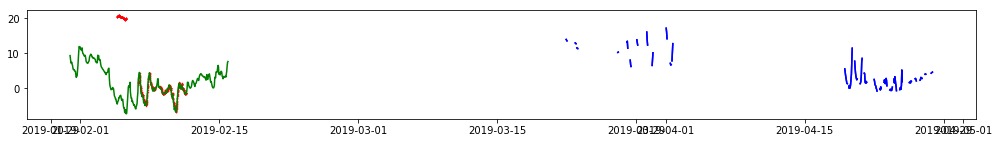

In [10]:
##plot
fig, ax = plt.subplots(figsize=(17, 2))
plt.plot(atrh3.RH,'r.',markersize=1)
plt.plot(wx1['AT'],'b-')
plt.plot(wx2['AT'],'b-')
plt.plot(wxdl['TA'],'g-')


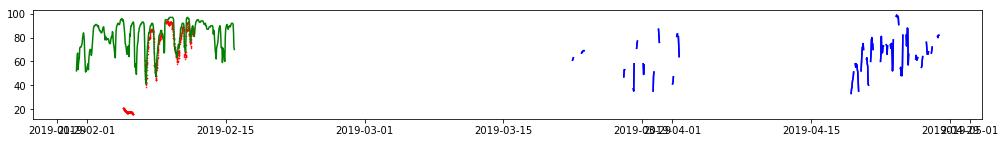

In [11]:
##plot
fig, ax = plt.subplots(figsize=(17, 2))
plt.plot(atrh3.AT,'r.',markersize=1)
plt.plot(wx1['RH'],'b-')
plt.plot(wx2['RH'],'b-')
plt.plot(wxdl['RH'],'g-')


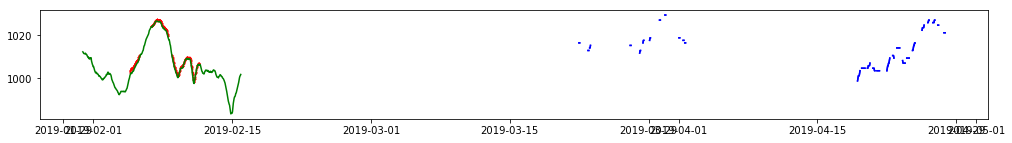

In [12]:
##plot
fig, ax = plt.subplots(figsize=(17, 2))
plt.plot(atrh1.BP,'r.',markersize=1)
plt.plot(wx1['BP'],'b-')
plt.plot(wx2['BP'],'b-')
plt.plot(wxdl['BP'],'g-')


(737094.0, 737099.0)

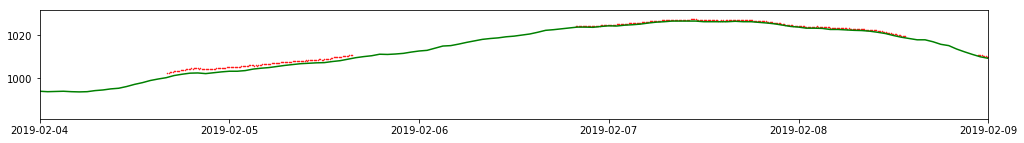

In [14]:
##plot
fig, ax = plt.subplots(figsize=(17, 2))
plt.plot(atrh1.BP,'r.',markersize=1)
plt.plot(wx1['BP'],'b-')
plt.plot(wx2['BP'],'b-')
plt.plot(wxdl['BP'],'g-')

plt.xlim(['2019-02-04','2019-02-09'])

(737169.0, 737180.0)

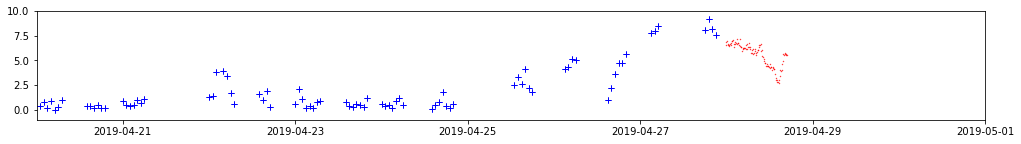

In [19]:
fig, ax = plt.subplots(figsize=(17, 2))
plt.plot(np.sqrt(atrh2.U**2 + atrh2.V**2),'r.',markersize=.75)
plt.plot(wx1['WS'],'b+')
plt.plot(wx2['WS'],'b+')
plt.plot(wxdl['WS'],'g+')

plt.ylim([-1,10])
plt.xlim(['2019-04-20','2019-05-01'])

(737169.0, 737180.0)

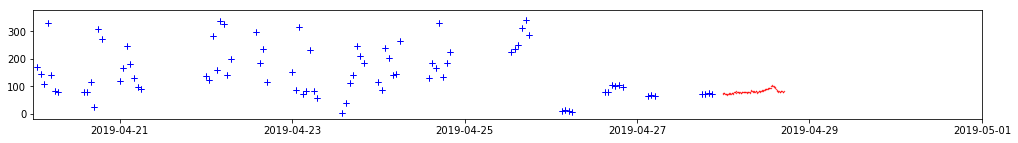

In [20]:
fig, ax = plt.subplots(figsize=(17, 2))
plt.plot(180+np.rad2deg(np.arctan2(atrh2.U, atrh2.V)),'r.',markersize=.75)
plt.plot(wx1['WD'],'b+')
plt.plot(wx2['WD'],'b+')
plt.plot(wxdl['WD'],'g+')

plt.xlim(['2019-04-20','2019-05-01'])

### Subsample ATRH to hourly (grab closest to top of hour) for difference plots 
- alternatively, upsample (with np.nan's) the Peggy data and compare

In [191]:
wx1u = wxpak1.resample('10T').median()
wx2u = wxpak2.resample('10T').median()

In [195]:
#atrh2.to_csv('atrh2.csv')
wx2u.to_csv('wxpak2.csv')

### Other Sensors
solar rad

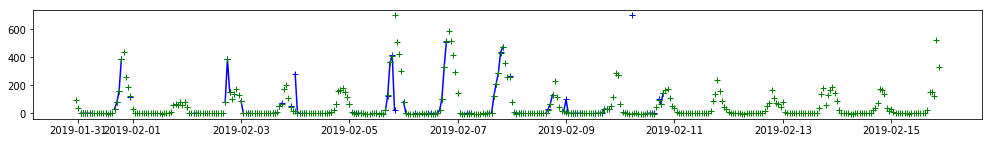

In [33]:
fig, ax = plt.subplots(figsize=(17, 2))
plt.plot(wx1['SR'],'b-+')
plt.plot(wx2['SR'],'b-+')
plt.plot(wxdl['SR'],'g+')
